
🔍 Training with z-score normalization

🔍 Training with min-max normalization

🔍 Training with decimal normalization


<ipython-input-2-b2b17576f8b0>:19: RuntimeWarning: overflow encountered in scalar add
  j = np.ceil(np.log10(max_val + 1))
<ipython-input-2-b2b17576f8b0>:19: RuntimeWarning: divide by zero encountered in log10
  j = np.ceil(np.log10(max_val + 1))



📊 Z-SCORE Normalization
Test accuracy: 0.5174


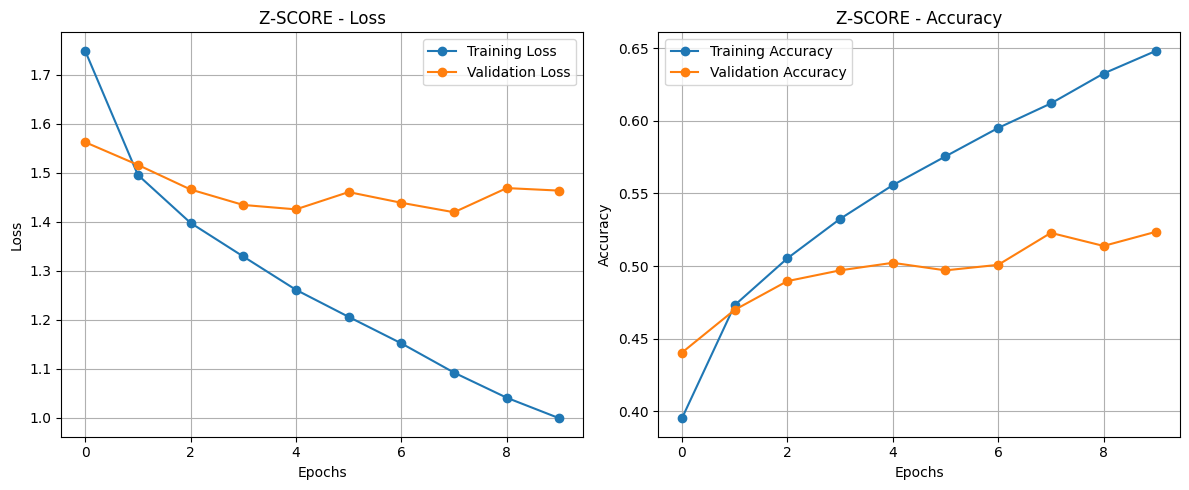


📊 MIN-MAX Normalization
Test accuracy: 0.4933


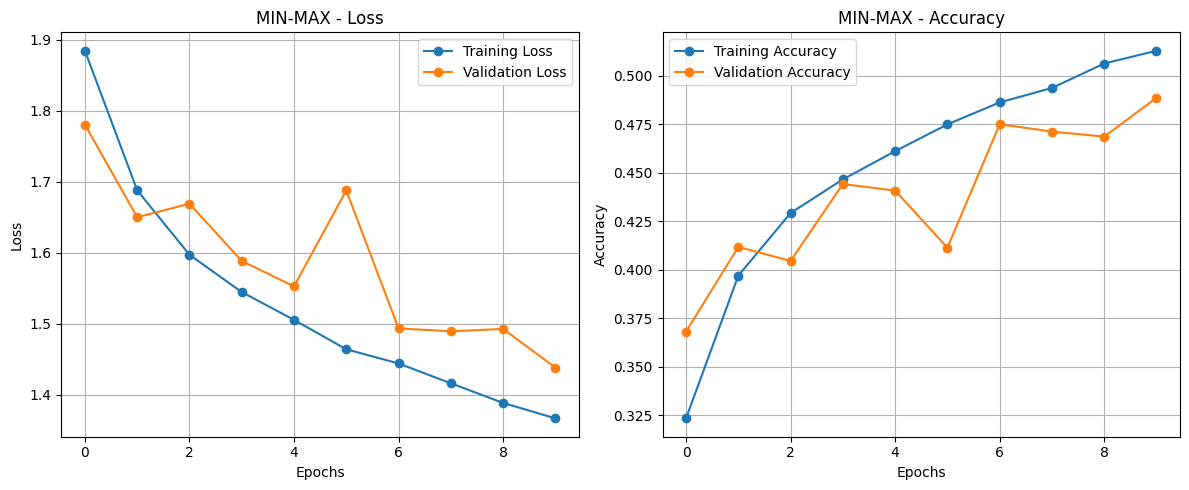


📊 DECIMAL Normalization


<ipython-input-2-b2b17576f8b0>:19: RuntimeWarning: overflow encountered in scalar add
  j = np.ceil(np.log10(max_val + 1))
<ipython-input-2-b2b17576f8b0>:19: RuntimeWarning: divide by zero encountered in log10
  j = np.ceil(np.log10(max_val + 1))


Test accuracy: 0.2501


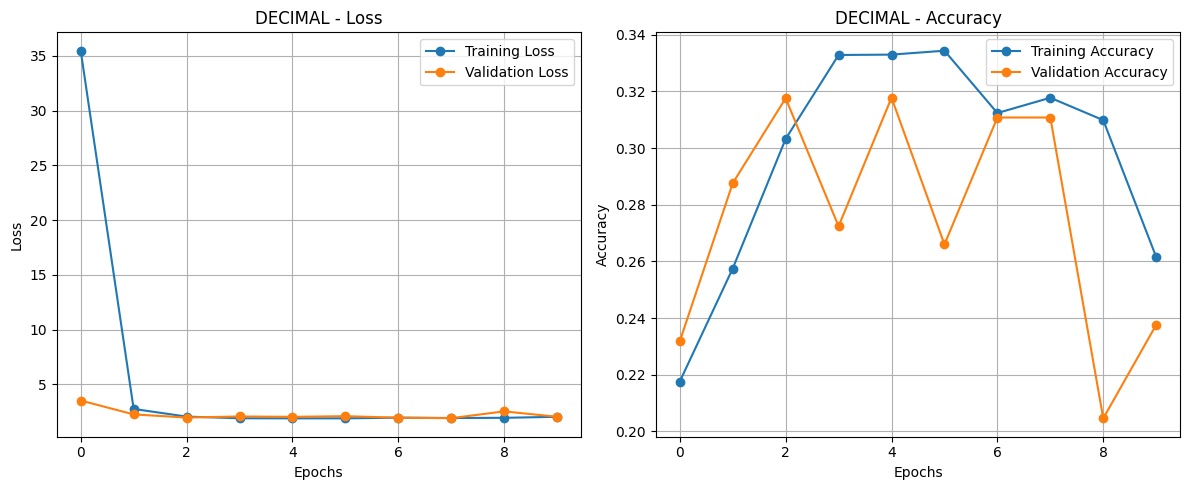

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

# One-hot labels if needed
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Decimal scaling function
def decimal_scaling(data):
    max_val = np.max(np.abs(data))
    j = np.ceil(np.log10(max_val + 1))
    return data / (10**j + 1)

# Build a basic ANN model
def build_ann_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(32*32*3,)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Plot history
def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')

# Normalize and train function
def normalize_and_train(x_train, x_test, method_name):
    if method_name == 'z-score':
        scaler = StandardScaler()
    elif method_name == 'min-max':
        scaler = MinMaxScaler()
    elif method_name == 'decimal':
        return decimal_scaling(x_train), decimal_scaling(x_test)

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled

normalizations = ['z-score', 'min-max', 'decimal']
histories = {}

for method in normalizations:
    print(f"\n🔍 Training with {method} normalization")
    x_train_norm, x_test_norm = normalize_and_train(x_train, x_test, method)
    model = build_ann_model()
    history = model.fit(x_train_norm, y_train,
                        validation_split=0.1,
                        epochs=10, batch_size=64, verbose=0)
    histories[method] = (history, model.evaluate(x_test_norm, y_test, verbose=0))

def plot_separate_graphs(history, label):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{label} - Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{label} - Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Re-run training and plot graphs individually
for method in normalizations:
    print(f"\n📊 {method.upper()} Normalization")
    x_train_norm, x_test_norm = normalize_and_train(x_train, x_test, method)
    model = build_ann_model()
    history = model.fit(x_train_norm, y_train,
                        validation_split=0.1,
                        epochs=10, batch_size=64, verbose=0)
    test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=0)
    print(f"Test accuracy: {test_acc:.4f}")
    plot_separate_graphs(history, method.upper())



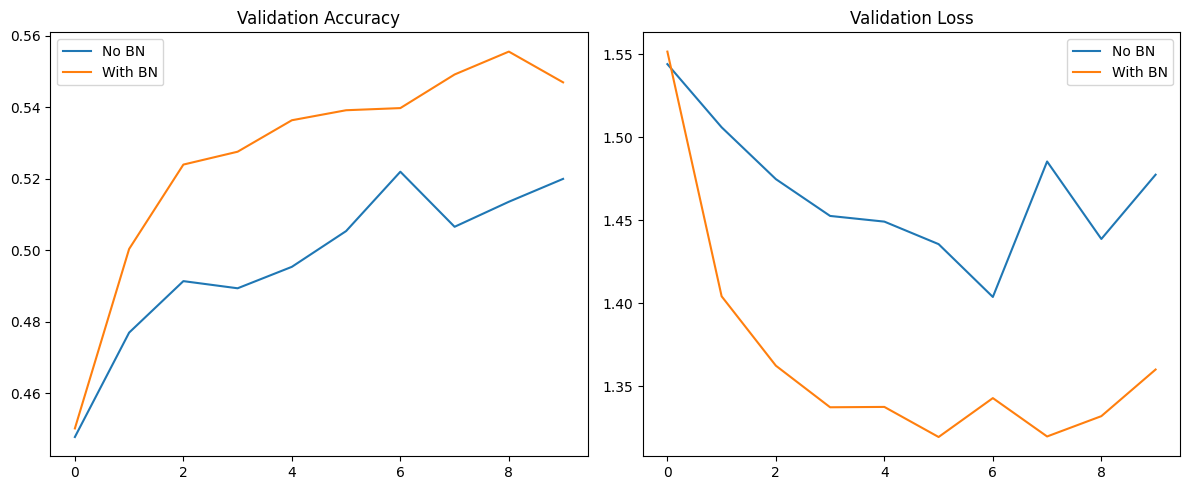

⏱️ Training time without BN: 198.58 seconds
⏱️ Training time with    BN: 228.19 seconds
🧪 Test Accuracy without BN: 0.5136
🧪 Test Accuracy with    BN: 0.5373


In [ ]:
import time

# Build model with optional batch normalization
def build_fc_model(use_bn=False):
    model = keras.Sequential()
    model.add(keras.Input(shape=(32*32*3,)))
    model.add(keras.layers.Dense(512, activation='relu'))
    if use_bn: model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(256, activation='relu'))
    if use_bn: model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Z-score normalize
scaler = StandardScaler()
x_train_z = scaler.fit_transform(x_train)
x_test_z = scaler.transform(x_test)

# Without BatchNorm
model1 = build_fc_model(use_bn=False)
start = time.time()
history1 = model1.fit(x_train_z, y_train, validation_split=0.1,
                      epochs=10, batch_size=64, verbose=0)
t1 = time.time() - start

# With BatchNorm
model2 = build_fc_model(use_bn=True)
start = time.time()
history2 = model2.fit(x_train_z, y_train, validation_split=0.1,
                      epochs=10, batch_size=64, verbose=0)
t2 = time.time() - start

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['val_accuracy'], label="No BN")
plt.plot(history2.history['val_accuracy'], label="With BN")
plt.title("Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['val_loss'], label="No BN")
plt.plot(history2.history['val_loss'], label="With BN")
plt.title("Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Compare times and accuracy
print(f"⏱️ Training time without BN: {t1:.2f} seconds")
print(f"⏱️ Training time with    BN: {t2:.2f} seconds")
print(f"🧪 Test Accuracy without BN: {model1.evaluate(x_test_z, y_test, verbose=0)[1]:.4f}")
print(f"🧪 Test Accuracy with    BN: {model2.evaluate(x_test_z, y_test, verbose=0)[1]:.4f}")


🧱 Training CNN without Batch Normalization...
🧱 Training CNN with Batch Normalization...


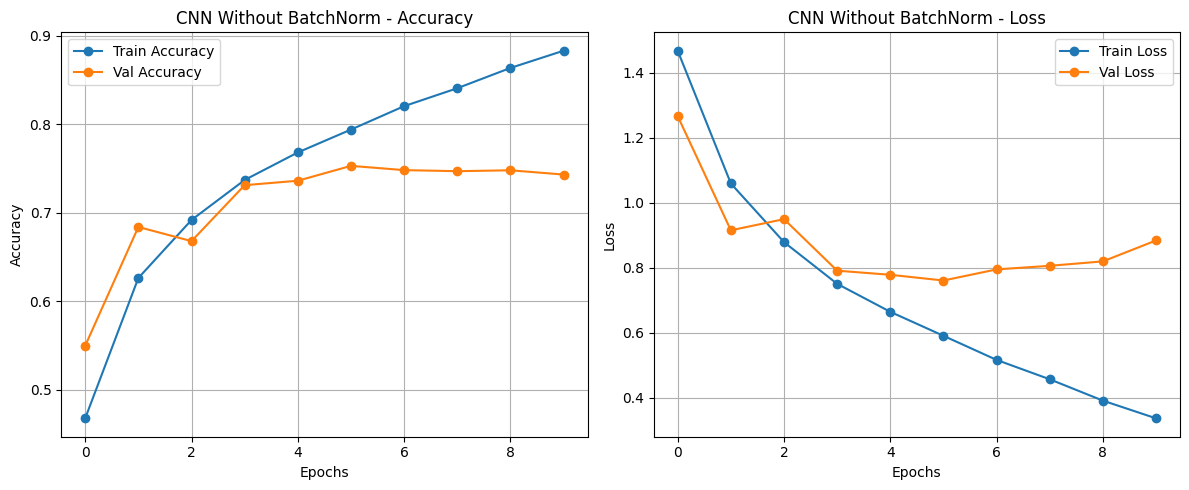

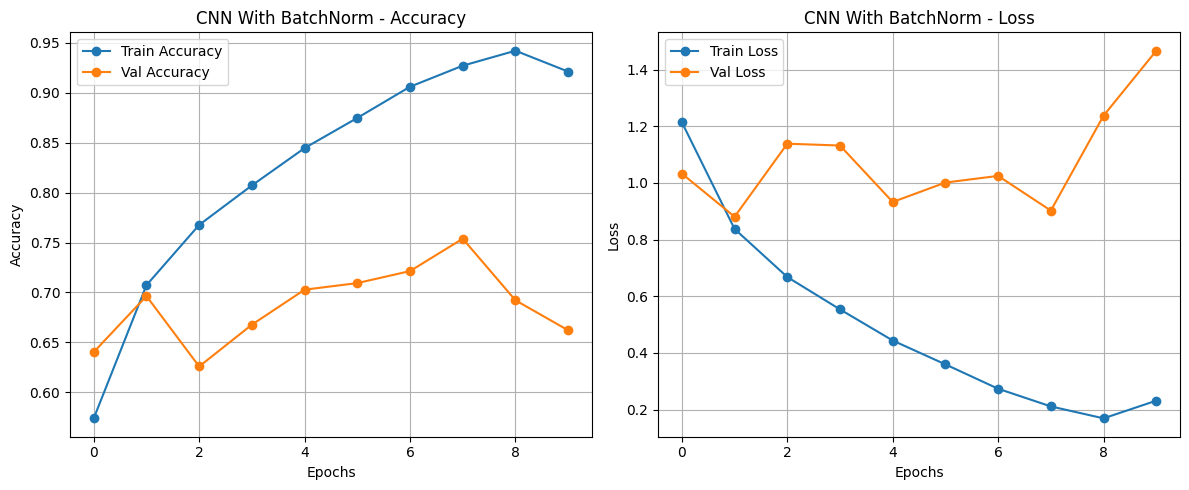


📊 Final Comparison:
⏱️ Time without BatchNorm: 1348.84 sec
⏱️ Time with BatchNorm   : 1397.63 sec
🧪 Test accuracy without BatchNorm: 0.7322
🧪 Test accuracy with    BatchNorm: 0.6511


In [ ]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

# (a) Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.squeeze(), y_test.squeeze()

# (b) Define CNN models
def build_cnn(use_batch_norm=False):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

    for filters in [32, 64, 128]:
        model.add(tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', padding='same'))
        if use_batch_norm:
            model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    if use_batch_norm:
        model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Utility to plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# (c) Train both models for 10 epochs
batch_size = 64
epochs = 10

print("🧱 Training CNN without Batch Normalization...")
cnn_no_bn = build_cnn(use_batch_norm=False)
start_time = time.time()
history_no_bn = cnn_no_bn.fit(x_train, y_train,
                              validation_split=0.1,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0)
time_no_bn = time.time() - start_time

print("🧱 Training CNN with Batch Normalization...")
cnn_with_bn = build_cnn(use_batch_norm=True)
start_time = time.time()
history_with_bn = cnn_with_bn.fit(x_train, y_train,
                                  validation_split=0.1,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  verbose=0)
time_with_bn = time.time() - start_time

# (d) Plot and compare
plot_history(history_no_bn, "CNN Without BatchNorm")
plot_history(history_with_bn, "CNN With BatchNorm")

# Evaluate on test set
test_loss_no_bn, test_acc_no_bn = cnn_no_bn.evaluate(x_test, y_test, verbose=0)
test_loss_with_bn, test_acc_with_bn = cnn_with_bn.evaluate(x_test, y_test, verbose=0)

# Print comparison
print("\n📊 Final Comparison:")
print(f"⏱️ Time without BatchNorm: {time_no_bn:.2f} sec")
print(f"⏱️ Time with BatchNorm   : {time_with_bn:.2f} sec")
print(f"🧪 Test accuracy without BatchNorm: {test_acc_no_bn:.4f}")
print(f"🧪 Test accuracy with    BatchNorm: {test_acc_with_bn:.4f}")
